In [87]:
import pandas as pd
import numpy as np
from Bio import SeqIO

In [86]:
blast_output_file = 'sample03_at_ACACA.out'
reads_file = 'sample03_2_trim_min30.fasta'
output_file = 'reads_to_extend'

In [83]:
header = ['query', 'target', 'identity', 'alignment_light', 'number_mismatches', 'number_gaps', 
          's_q', 'e_q', 's_t', 'e_t', 'e-value', 'score']
unmapped = pd.read_csv(blast_output, delimiter='\t', header=None, names=header)


In [85]:
print(unmapped.head())
print(unmapped.describe())

             query target  identity  alignment_light  number_mismatches  \
0   SRR064438.2214  ACACA   100.000               36                  0   
1   SRR064438.6694  ACACA    94.444               18                  1   
2   SRR064438.7073  ACACA    90.000               20                  2   
3   SRR064438.8776  ACACA    90.000               20                  2   
4  SRR064438.10911  ACACA    96.667               30                  0   

   number_gaps  s_q  e_q   s_t   e_t       e-value  score  
0            0    1   36  4203  4238  1.990000e-15   66.2  
1            0    7   24  1168  1185  5.210000e-04   28.3  
2            0    2   21  1770  1751  4.170000e-04   28.3  
3            0   17   36  2337  2318  7.290000e-04   28.3  
4            1    1   30   705   733  1.470000e-09   46.4  
           identity  alignment_light  number_mismatches   number_gaps  \
count  16466.000000     16466.000000       16466.000000  16466.000000   
mean      94.565539        28.090307       

In [17]:
fasta_sequences = SeqIO.parse(open(reads_file),'fasta')
# with open(output_file) as out_file:
data = []
for fasta in fasta_sequences:
    data.append((fasta.id, fasta.seq.tostring()))

/Users/theo/.pyenv/versions/3.4.3/lib/python3.4/site-packages/Bio/Seq.py:343: BiopythonDeprecationWarning: This method is obsolete; please use str(my_seq) instead of my_seq.tostring().
  BiopythonDeprecationWarning)


In [89]:
reads = pd.DataFrame(data)
reads.columns = ['query', 'seq']
reads.head()

query                                                seq
0  SRR064438.7290443  TAGAGCTGAACCGGATGAGAAATTTTGACCTCACTGCCATTCCATG...
1  SRR064438.7292226  TTCAAGCACTGACAGTTTTTACGAGTGACTATTCAAAGAATGCACA...
2  SRR064438.7292726  AGAGCTCTGAGGATGTGGGAGAGAAGCTGGCTAAGGGCTGGACAGT...
3  SRR064438.7293073  TCTTTTCACCGTAGGTGGCCTGACTGGCATTGTATTAGCAAACTCA...
4  SRR064438.7293601  AGCAGAGCGAGTCAAATTTGTGTTTGAGACAGAAAATGGATTACTA...

In [90]:
unmapped_with_seq = pd.merge(unmapped, reads, on='query', how='left')
unmapped_with_seq.head()

query target  identity  alignment_light  number_mismatches  \
0   SRR064438.2214  ACACA   100.000               36                  0   
1   SRR064438.6694  ACACA    94.444               18                  1   
2   SRR064438.7073  ACACA    90.000               20                  2   
3   SRR064438.8776  ACACA    90.000               20                  2   
4  SRR064438.10911  ACACA    96.667               30                  0   

   number_gaps  s_q  e_q   s_t   e_t       e-value  score  \
0            0    1   36  4203  4238  1.990000e-15   66.2   
1            0    7   24  1168  1185  5.210000e-04   28.3   
2            0    2   21  1770  1751  4.170000e-04   28.3   
3            0   17   36  2337  2318  7.290000e-04   28.3   
4            1    1   30   705   733  1.470000e-09   46.4   

                                                 seq  
0  TAGAGCTGAACCGGATGAGAAATTTTGACCTCACTGCCATTCCATG...  
1              GGGTGCTCATCTGGAGATGCAGATGGTAACAGTGCCT  
2  TGACCCAAGCATTGGTATCTACGGCCTGGACTTCTATGTGGTGCTG...  
3  AAAATATCTTCGTGCTTCCATGACTAACTTGGTCAAGATGGGCTTT...  
4                     CCCAGTACAAGCAGTGTGGGCTGGCTGGGG

In [21]:
# make fasta
with open(output_file + '.fasta', 'w') as f: 
    for q, s in df3[['query', 'seq']].iterrows():
        f.write('>%s\n' % s['query'])
        f.write('%s\n' % s['seq'])
        


In [22]:
# make fastq
with open(output_file + '.fasta', "r") as fasta:
    with open(output_file + '.fastq', "w") as fastq:
        for record in SeqIO.parse(fasta, "fasta"):
            record.letter_annotations["phred_quality"] = [40] * len(record)
            SeqIO.write(record, fastq, "fastq")

In [91]:
unmapped_with_seq['l_t'] = unmapped_with_seq['s_t'] - unmapped_with_seq['e_t']
unmapped_with_seq['len'] = unmapped_with_seq['seq'].str.len()

(16574, 15)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x173080d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1139e0978>]], dtype=object)

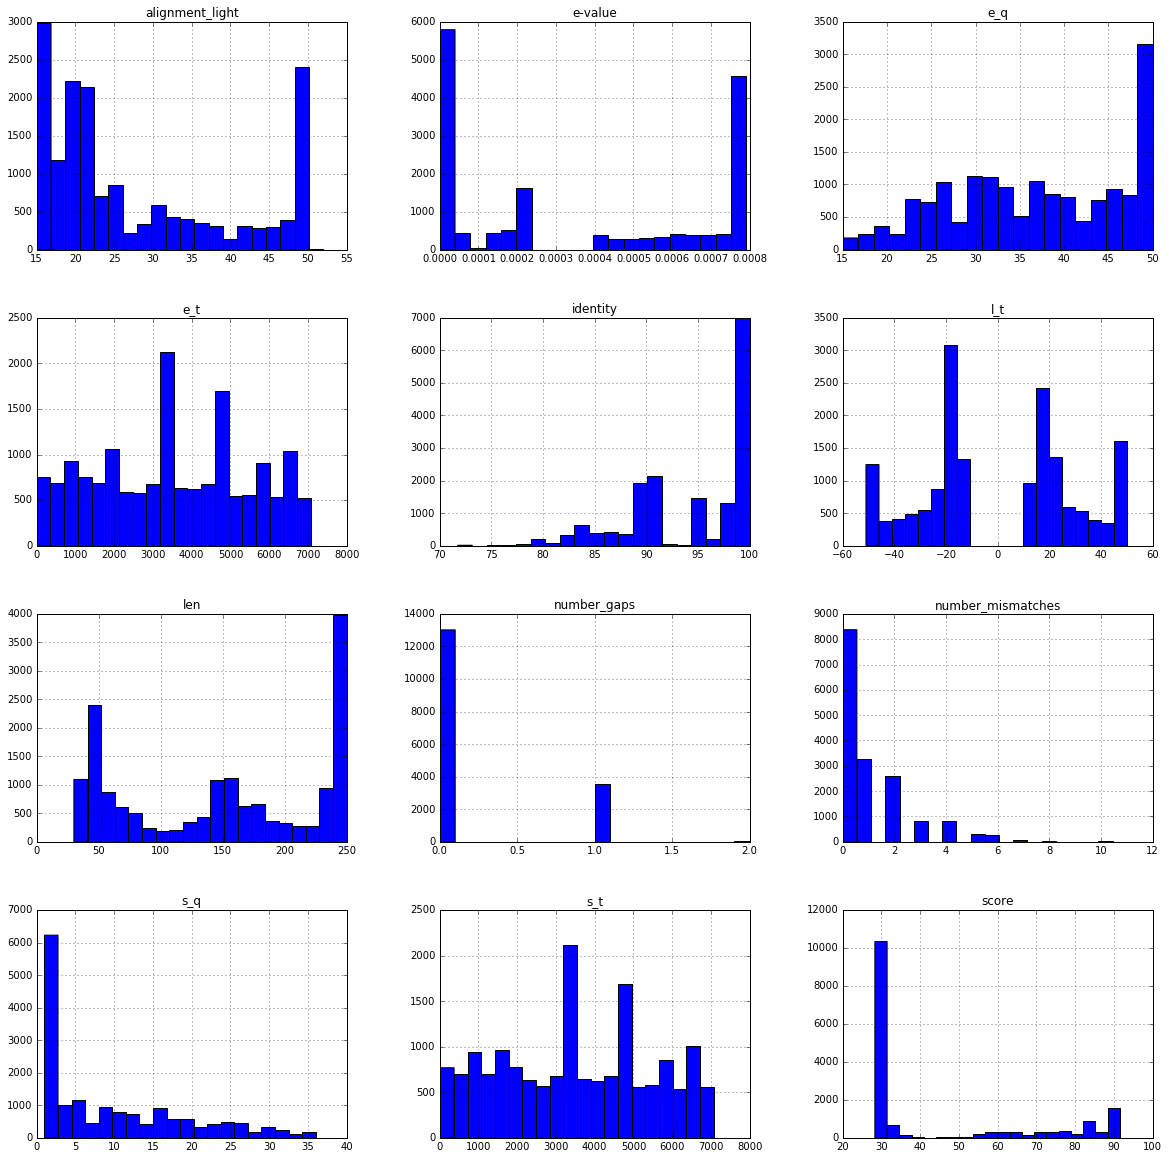

In [92]:
%matplotlib inline
# filter = df3['score']<50
filter = unmapped_with_seq['score'] > 0
# filter = df4['l_t'] > 0
print(unmapped_with_seq[filter].shape)
unmapped_with_seq[filter].sort_values(by='e_t', ascending=False).hist(figsize=(20,20), bins=20)